In [14]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib as plt


In [3]:
# Importing and parsing the date time in USvideos.csv
youtube_data = pd.read_csv("youtube_data/USvideos.csv",
                           parse_dates=["publish_time"])
youtube_data.sample().T

,7359
video_id,bw_ob5GFi6I
trending_date,17.20.12
title,Ciara - Santa Baby (Taraji's White Hot Holiday...
channel_title,cicigoodies2011
category_id,10
publish_time,2017-12-15 05:13:47+00:00
tags,"Ciara|""cici""|""christmas""|""santa baby""|""Taraji ..."
views,27765
likes,580
dislikes,25


In [4]:
# Reformat the trending date column into datetime objects by using datetime.strptime
youtube_data["trending_date"] = youtube_data["trending_date"].apply(
    lambda date_string: datetime.strptime(date_string, "%y.%d.%m"))

In [5]:
# Read in the JSON that contains the category names and create a new column called genre for the relevant id
json_data = pd.read_json("youtube_data/US_category_id.json")
dct = {}
json_data["items"].apply(lambda obj: dct.update(
    {obj["id"]: obj["snippet"]["title"]}))
youtube_data["genre"] = youtube_data["category_id"].apply(lambda id: dct[str(id)])

In [80]:
youtube_data.head().T

,0,1,2,3,4
video_id,2kyS6SvSYSE,1ZAPwfrtAFY,5qpjK5DgCt4,puqaWrEC7tY,d380meD0W0M
trending_date,2017-11-14 00:00:00,2017-11-14 00:00:00,2017-11-14 00:00:00,2017-11-14 00:00:00,2017-11-14 00:00:00
title,WE WANT TO TALK ABOUT OUR MARRIAGE,The Trump Presidency: Last Week Tonight with J...,"Racist Superman | Rudy Mancuso, King Bach & Le...",Nickelback Lyrics: Real or Fake?,I Dare You: GOING BALD!?
channel_title,CaseyNeistat,LastWeekTonight,Rudy Mancuso,Good Mythical Morning,nigahiga
category_id,22,24,23,24,24
publish_time,2017-11-13 00:00:00,2017-11-13 00:00:00,2017-11-12 00:00:00,2017-11-13 00:00:00,2017-11-12 00:00:00
tags,SHANtell martin,"last week tonight trump presidency|""last week ...","racist superman|""rudy""|""mancuso""|""king""|""bach""...","rhett and link|""gmm""|""good mythical morning""|""...","ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""..."
views,748374,2418783,3191434,343168,2095731
likes,57527,97185,146033,10172,132235
dislikes,2966,6146,5339,666,1989


In [81]:
# youtube_data["likes"].sample(25).plot.hist()
# sns.histplot(youtube_data["likes"], bins=20)



74266.7024347359

In [82]:
# Remove the Timezone information from the publish_time column to avoid issues subtracting the datetime columns in the data
youtube_data["publish_time"] = youtube_data["publish_time"].apply(lambda x: x.tz_localize(None))
# 



In [84]:
# Floor the publish time by Day to avoid incorrect math being applied later
youtube_data["publish_time"] = youtube_data["publish_time"].dt.floor("D")
youtube_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,genre,Time Difference
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0 days 06:46:59
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,0 days 16:30:00
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,1 days 04:54:36
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,0 days 12:59:56
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,1 days 05:58:19


In [85]:
# Calculate the time it took for each video to make it onto the Trending page

youtube_data["Time Difference"] = (youtube_data["trending_date"] - youtube_data["publish_time"])
# (youtube_data["trending_date"].dt.date - youtube_data["publish_time"].dt.date)
# youtube_data.iloc[16294]
youtube_data.iloc[youtube_data["Time Difference"].idxmin()]
# youtube_data.tail()

video_id                                                        xL_qpDkF5A8
trending_date                                           2017-11-15 00:00:00
title                     American Crime Story Season 2: The Assassinati...
channel_title                                                     TV Promos
category_id                                                              24
publish_time                                            2017-11-15 00:00:00
tags                      Donatella Versace|"Antonio D' Amico"|"Penelope...
views                                                                 14565
likes                                                                   478
dislikes                                                                 13
comment_count                                                            67
thumbnail_link               https://i.ytimg.com/vi/xL_qpDkF5A8/default.jpg
comments_disabled                                                     False
ratings_disa

<Axes: >

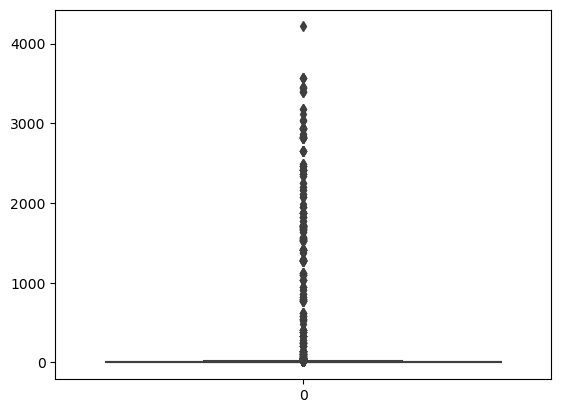

In [89]:
# simple boxplot of all time differences

sns.boxplot(youtube_data["Time Difference"].dt.days)
# youtube_data["Time Difference"][0].days
# type(youtube_data["Time Difference"].dt.date[0])

In [96]:
# random calculations
youtube_data.iloc[16294]
youtube_data["Time Difference"].mean()
youtube_data["Time Difference"].median()


Timedelta('5 days 00:00:00')

<Axes: >

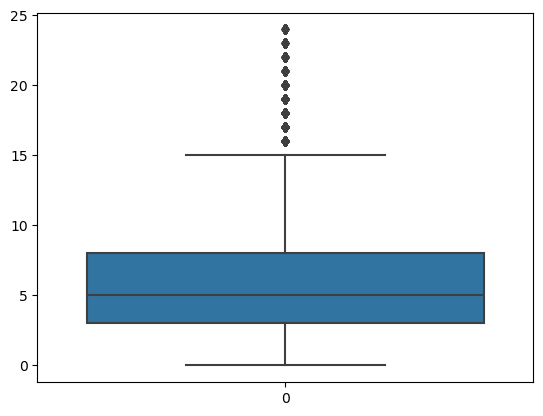

In [104]:
# Next step is to group and categorize to remove outliers
youtube_data["Time Difference"].describe()

removed_outlier_df = youtube_data[youtube_data["Time Difference"] < timedelta(days=25)]
sns.boxplot(removed_outlier_df["Time Difference"].dt.days)


In [112]:
removed_outlier_df["Time Difference"].describe()
only_zeros_df = youtube_data[youtube_data["Time Difference"] <= timedelta(days=0)]
only_zeros_df.size


2178

In [119]:
val_counts_df = youtube_data["Time Difference"].value_counts(normalize=True) 
val_counts_df.loc['0 days']

0.0029548951134337836